In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_excel("E:\gene_original data/I A & B vs Controls.xlsx")
df2=pd.read_excel("E:\gene_original data/IIB vs Control.xlsx")
df3=pd.read_excel("E:\gene_original data/III A & B vs Control.xlsx")
df4=pd.read_excel("E:\gene_original data/IV A vs Control.xlsx")

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(2622, 10)
(3603, 10)
(2579, 10)
(3291, 10)


In [4]:
df1.head()

,Transcript Cluster ID,CC- I A & B Bi-weight Avg Signal (log2),Control Bi-weight Avg Signal (log2),Fold Change (linear) (CC- I A & B vs. Control),ANOVA p-value (CC- I A & B vs. Control),FDR p-value (CC- I A & B vs. Control),Gene Symbol,Description,Group,TC Comment
0,TC0100015264.hg.1,11.88,8.46,10.74,0.000008,0.532758,RP5-1180E21.5,"novel transcript, antisense to CEPT1",NonCoding,NaN
1,TC1100012734.hg.1,6.12,4.62,2.84,0.000031,0.597329,NaN,NaN,NonCoding,NaN
2,TC0300009338.hg.1,8.30,3.53,27.27,0.000036,0.597329,MIR15B,microRNA 15b,Precursor_microRNA,NaN
3,TC0400008101.hg.1,8.91,10.16,-2.38,0.000040,0.597329,NaN,NaN,NonCoding,NaN
4,TC0500010247.hg.1,6.35,3.14,9.24,0.000063,0.714653,CTD-2023M8.1; zoyplarby,novel transcript; Transcript Identified by Ace...,NonCoding,NaN


In [5]:
df2.head()

,Transcript Cluster ID,II B Bi-weight Avg Signal (log2),Control Bi-weight Avg Signal (log2),Fold Change (linear) (II B vs. Control),ANOVA p-value (II B vs. Control),FDR p-value (II B vs. Control),Gene Symbol,Description,Group,TC Comment
0,TC1000007032.hg.1,5.77,7.01,-2.35,0.000027,0.607222,PRINS,PRINS RNA [Source:RFAM;Acc:RF01878],NonCoding,NaN
1,TC0400011695.hg.1,11.00,12.54,-2.91,0.000027,0.607222,SEC24D,"SEC24 homolog D, COPII coat complex component",Multiple_Complex,NaN
2,TC0900012219.hg.1,12.26,3.24,518.87,0.000036,0.607222,CDKN2A,cyclin-dependent kinase inhibitor 2A,Multiple_Complex,NaN
3,TC0500010627.hg.1,8.63,7.62,2.01,0.000057,0.607222,LOC648987; LOC100132356; CTD-2201E18.3,uncharacterized LOC648987; uncharacterized LOC...,NonCoding,NaN
4,TC1600009707.hg.1,6.40,8.10,-3.24,0.000059,0.607222,pleypo,Transcript Identified by AceView,Unassigned,NaN


In [12]:
df3['TC Comment'].isna().value_counts()

True    2579
Name: TC Comment, dtype: int64

In [7]:
df4.head()

,Transcript Cluster ID,IV A Bi-weight Avg Signal (log2),Control Bi-weight Avg Signal (log2),Fold Change (linear) (IV A vs. Control),ANOVA p-value (IV A vs. Control),FDR p-value (IV A vs. Control),Gene Symbol,Description,Group,TC Comment
0,TC0100015264.hg.1,12.60,8.46,17.68,0.000012,0.574945,RP5-1180E21.5,"novel transcript, antisense to CEPT1",NonCoding,NaN
1,TC0100017834.hg.1,12.47,6.26,74.32,0.000032,0.574945,GNG4,guanine nucleotide binding protein (G protein)...,Multiple_Complex,NaN
2,TC0300008561.hg.1,16.96,13.12,14.37,0.000047,0.574945,PARP14,poly(ADP-ribose) polymerase family member 14,Multiple_Complex,NaN
3,TC0500010853.hg.1,7.10,4.46,6.20,0.000049,0.574945,karflu,Transcript Identified by AceView,Unassigned,NaN
4,TC1200008091.hg.1,5.20,2.92,4.87,0.000056,0.574945,NaN,NaN,NonCoding,NaN


In [16]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key order
        * outer: use union of keys from both frames, similar to a SQL full outer
          join;

In [17]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

In [20]:
df1['Stage']=1

In [22]:
df2['Stage']=2

In [27]:
df4['Stage']=4

In [25]:
df3['Stage']=3

In [28]:
df4

,Transcript Cluster ID,IV A Bi-weight Avg Signal (log2),Control Bi-weight Avg Signal (log2),Fold Change (linear) (IV A vs. Control),ANOVA p-value (IV A vs. Control),FDR p-value (IV A vs. Control),Gene Symbol,Description,Group,TC Comment,Stage
0,TC0100015264.hg.1,12.60,8.46,17.68,0.000012,0.574945,RP5-1180E21.5,"novel transcript, antisense to CEPT1",NonCoding,NaN,4
1,TC0100017834.hg.1,12.47,6.26,74.32,0.000032,0.574945,GNG4,guanine nucleotide binding protein (G protein)...,Multiple_Complex,NaN,4
2,TC0300008561.hg.1,16.96,13.12,14.37,0.000047,0.574945,PARP14,poly(ADP-ribose) polymerase family member 14,Multiple_Complex,NaN,4
3,TC0500010853.hg.1,7.10,4.46,6.20,0.000049,0.574945,karflu,Transcript Identified by AceView,Unassigned,NaN,4
4,TC1200008091.hg.1,5.20,2.92,4.87,0.000056,0.574945,NaN,NaN,NonCoding,NaN,4
5,TC0300012211.hg.1,5.37,7.41,-4.10,0.000068,0.574945,PTPLB,"Transcript Identified by AceView, Entrez Gene ...",Unassigned,NaN,4
6,TC0900009946.hg.1,4.40,3.38,2.02,0.000080,0.574945,SIT1,signaling threshold regulating transmembrane a...,Multiple_Complex,NaN,4
7,TC1700010860.hg.1,3.70,2.55,2.21,0.000101,0.574945,mesuri,Transcript Identified by AceView,Unassigned,NaN,4
8,TC1200006651.hg.1,5.22,3.63,3.01,0.000104,0.574945,NaN,NaN,NonCoding,NaN,4
9,TC1100012478.hg.1,8.11,4.85,9.57,0.000106,0.574945,CD3D,"CD3d molecule, delta (CD3-TCR complex)",Multiple_Complex,NaN,4


In [29]:
2622+3603+2579+3291

12095

In [32]:
(df1.columns)==(df2.columns)

array([ True, False,  True, False, False, False,  True,  True,  True,
        True,  True])

In [33]:
all_df=pd.concat([df1,df2,df3,df4])

C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [34]:
all_df.columns

Index(['ANOVA p-value (CC- I A & B vs. Control)',
       'ANOVA p-value (II B vs. Control)',
       'ANOVA p-value (III A & B vs. Control)',
       'ANOVA p-value (IV A vs. Control)',
       'CC- I A & B Bi-weight Avg Signal (log2)',
       'Control Bi-weight Avg Signal (log2)', 'Description',
       'FDR p-value (CC- I A & B vs. Control)',
       'FDR p-value (II B vs. Control)', 'FDR p-value (III A & B vs. Control)',
       'FDR p-value (IV A vs. Control)',
       'Fold Change (linear) (CC- I A & B vs. Control)',
       'Fold Change (linear) (II B vs. Control)',
       'Fold Change (linear) (III A & B vs. Control)',
       'Fold Change (linear) (IV A vs. Control)', 'Gene Symbol', 'Group',
       'II B Bi-weight Avg Signal (log2)',
       'III A & B Bi-weight Avg Signal (log2)',
       'IV A Bi-weight Avg Signal (log2)', 'Stage', 'TC Comment',
       'Transcript Cluster ID'],
      dtype='object')

In [35]:
all_df['Stage'].value_counts()

2    3603
4    3291
1    2622
3    2579
Name: Stage, dtype: int64

In [37]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12095 entries, 0 to 3290
Data columns (total 23 columns):
ANOVA p-value (CC- I A & B vs. Control)           2622 non-null float64
ANOVA p-value (II B vs. Control)                  3603 non-null float64
ANOVA p-value (III A & B vs. Control)             2579 non-null float64
ANOVA p-value (IV A vs. Control)                  3291 non-null float64
CC- I A & B Bi-weight Avg Signal (log2)           2622 non-null float64
Control Bi-weight Avg Signal (log2)               12095 non-null float64
Description                                       9475 non-null object
FDR p-value (CC- I A & B vs. Control)             2622 non-null float64
FDR p-value (II B vs. Control)                    3603 non-null float64
FDR p-value (III A & B vs. Control)               2579 non-null float64
FDR p-value (IV A vs. Control)                    3291 non-null float64
Fold Change (linear) (CC- I A & B vs. Control)    2622 non-null float64
Fold Change (linear) (II B v

In [40]:
all_df['Gene Symbol'].value_counts()

Y_RNA                           28
KAT6B                           14
F10                              9
SNORA70                          9
shavoby                          8
FMN1                             8
LRP6                             8
SLIT2                            7
ATG16L1                          7
ANK2                             7
ZNF660                           6
IL1RAP                           6
TTC28                            6
IGKV2-40                         5
TRPS1                            5
wuklar                           5
PIK3CB                           5
glokeebu                         5
ALOX12                           4
CCDC8                            4
RNA5SP51                         4
ADIRF; AGAP11; BMS1P3            4
PARP12                           4
RCC2                             4
FMO2                             4
TRAJ8                            4
NR2F2-AS1                        4
KLHL2P1                          4
waslawbu            

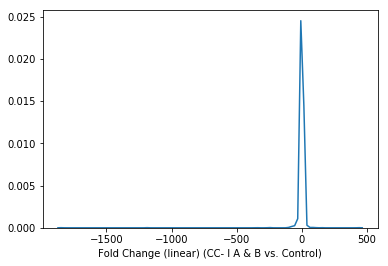

In [47]:
sns.distplot(all_df[all_df['Stage']==1]['Fold Change (linear) (CC- I A & B vs. Control)'],hist=False)

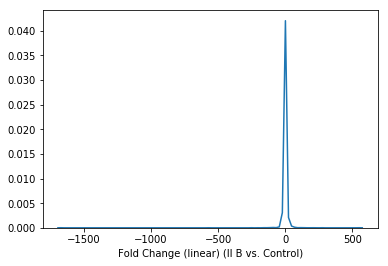

In [49]:
sns.distplot(all_df[all_df['Stage']==2]['Fold Change (linear) (II B vs. Control)'],hist=False)

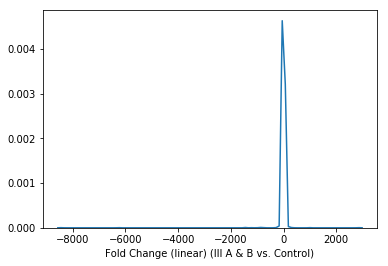

In [50]:
sns.distplot(all_df[all_df['Stage']==3]['Fold Change (linear) (III A & B vs. Control)'],hist=False)

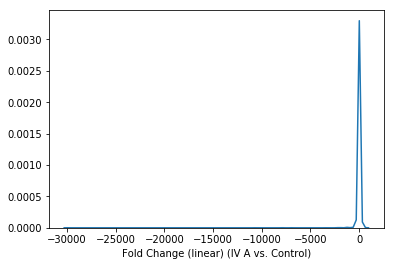

In [51]:
sns.distplot(all_df[all_df['Stage']==4]['Fold Change (linear) (IV A vs. Control)'],hist=False)

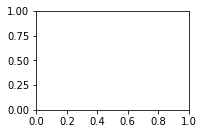

In [54]:
plt.subplot(2,2,1)

In [55]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

In [56]:
all_df[all_df['Stage']==4]['Fold Change (linear) (IV A vs. Control)'].describe()

count     3291.000000
mean       -23.124576
std        596.150098
min     -29917.660000
25%         -2.270000
50%          2.360000
75%          3.585000
max        602.800000
Name: Fold Change (linear) (IV A vs. Control), dtype: float64

In [57]:
all_df[all_df['Stage']==1]['Fold Change (linear) (CC- I A & B vs. Control)'].describe()

count    2622.000000
mean       -1.211937
std        46.000618
min     -1842.670000
25%        -2.660000
50%         2.290000
75%         3.460000
max       434.810000
Name: Fold Change (linear) (CC- I A & B vs. Control), dtype: float64

In [58]:
all_df[all_df['Stage']==2]['Fold Change (linear) (II B vs. Control)'].describe()

count    3603.000000
mean        0.428362
std        35.843462
min     -1672.850000
25%        -3.180000
50%         2.070000
75%         3.660000
max       553.890000
Name: Fold Change (linear) (II B vs. Control), dtype: float64

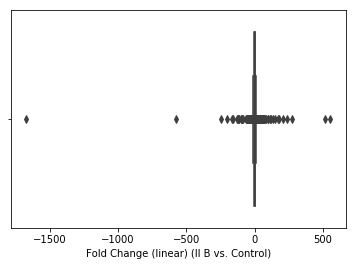

In [59]:
sns.boxplot(all_df[all_df['Stage']==2]['Fold Change (linear) (II B vs. Control)'])

In [2]:
exup_df1=pd.read_excel("E:/gene_original data/extreme_upreg_IA&B.xlsx")
exup_df2=pd.read_excel("E:/gene_original data/extreme_upreg_IIB.xlsx")
exup_df3=pd.read_excel("E:/gene_original data/extreme_upreg_IIIB.xlsx")
exup_df4=pd.read_excel("E:/gene_original data/extreme_upreg_IVA.xlsx")
exdown_df1=pd.read_excel("E:/gene_original data/extreme_downreg_IA&B.xlsx")
exdown_df2=pd.read_excel("E:/gene_original data/extreme_downreg_IIB.xlsx")
exdown_df3=pd.read_excel("E:/gene_original data/extreme_downreg_IIIB.xlsx")
exdown_df4=pd.read_excel("E:/gene_original data/extreme_downreg_IVA.xlsx")

In [3]:
exup_df1

,Fold Change (linear) (CC- I A & B vs. Control),ANOVA p-value (CC- I A & B vs. Control),Gene Symbol,log2_FC,abs_log2,logpv,color
373,106.81,0.005768,CDKN2A,6.738903,6.738903,2.238975,grey
1178,79.83,0.020228,C15orf48; MIR147B,6.318859,6.318859,1.694047,grey
1432,76.97,0.024975,KYNU,6.266224,6.266224,1.602495,grey
1485,434.81,0.025928,SPP1,8.764241,8.764241,1.586231,grey
1728,85.20,0.030880,GNLY,6.412782,6.412782,1.510323,grey
2334,149.59,0.043642,CXCL9,7.224870,7.224870,1.360095,grey


In [12]:
#exup_df1['Gene Symbol'].value_counts()

In [11]:
#exup_df2

In [10]:
#exup_df3

In [9]:
#exup_df4

In [5]:
#exdown_df1

In [6]:
#exdown_df2

In [7]:
#exdown_df3

In [8]:
#exdown_df4

In [13]:
stage1_df=pd.concat([exup_df1,exdown_df1])

In [15]:
#stage1_df

In [16]:
stage2_df=pd.concat([exup_df2,exdown_df2])

In [17]:
stage3_df=pd.concat([exup_df3,exdown_df3])

In [18]:
stage4_df=pd.concat([exup_df4,exdown_df4])

In [19]:
stage1_df['Stage']=1

In [20]:
stage2_df['Stage']=2

In [21]:
stage3_df['Stage']=3

In [22]:
stage4_df['Stage']=4

In [23]:
all_df=pd.concat([stage1_df,stage2_df,stage3_df,stage4_df])

C:\Users\umarsheaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [24]:
#all_df

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 373 to 2988
Data columns (total 14 columns):
ANOVA p-value (CC- I A & B vs. Control)           24 non-null float64
ANOVA p-value (II B vs. Control)                  36 non-null float64
ANOVA p-value (III A & B vs. Control)             50 non-null float64
ANOVA p-value (IV A vs. Control)                  98 non-null float64
Fold Change (linear) (CC- I A & B vs. Control)    24 non-null float64
Fold Change (linear) (II B vs. Control)           36 non-null float64
Fold Change (linear) (III A & B vs. Control)      50 non-null float64
Fold Change (linear) (IV A vs. Control)           98 non-null float64
Gene Symbol                                       207 non-null object
Stage                                             208 non-null int64
abs_log2                                          208 non-null float64
color                                             208 non-null object
log2_FC                                           77

In [26]:
all_df['Stage']=all_df['Stage'].astype('category')

In [27]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 373 to 2988
Data columns (total 14 columns):
ANOVA p-value (CC- I A & B vs. Control)           24 non-null float64
ANOVA p-value (II B vs. Control)                  36 non-null float64
ANOVA p-value (III A & B vs. Control)             50 non-null float64
ANOVA p-value (IV A vs. Control)                  98 non-null float64
Fold Change (linear) (CC- I A & B vs. Control)    24 non-null float64
Fold Change (linear) (II B vs. Control)           36 non-null float64
Fold Change (linear) (III A & B vs. Control)      50 non-null float64
Fold Change (linear) (IV A vs. Control)           98 non-null float64
Gene Symbol                                       207 non-null object
Stage                                             208 non-null category
abs_log2                                          208 non-null float64
color                                             208 non-null object
log2_FC                                          

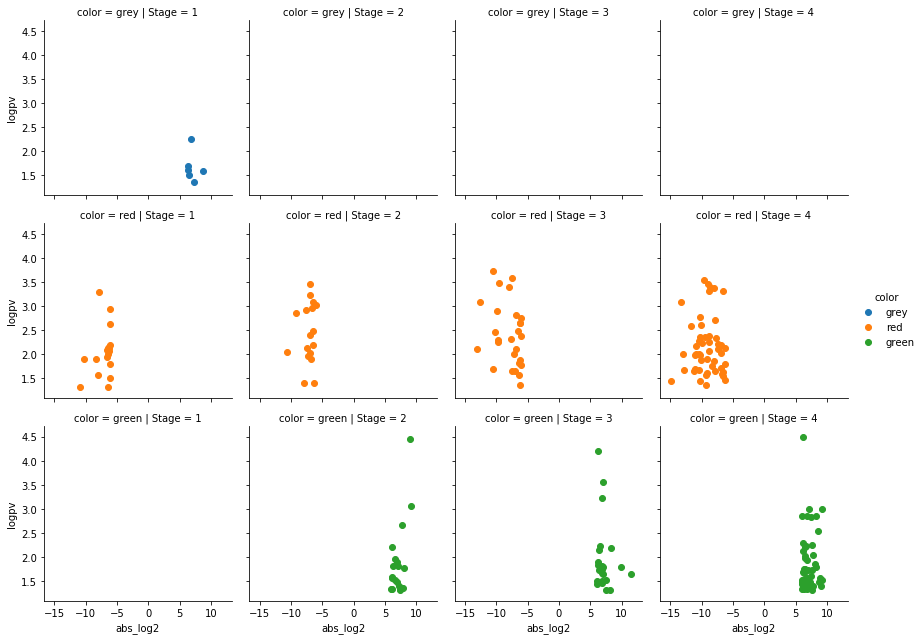

In [32]:
# create the FacetGrid instance
p = sns.FacetGrid(all_df, col="Stage", row='color',hue='color')
# choose the graph to display in each subplot
p.map(plt.scatter, 'abs_log2', 'logpv')
p.add_legend();

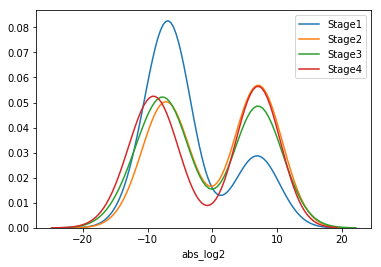

In [35]:

sns.distplot(all_df[all_df['Stage']==1]['abs_log2'],hist=False,label='Stage1')
sns.distplot(all_df[all_df['Stage']==2]['abs_log2'],hist=False,label='Stage2')
sns.distplot(all_df[all_df['Stage']==3]['abs_log2'],hist=False,label='Stage3')
sns.distplot(all_df[all_df['Stage']==4]['abs_log2'],hist=False,label='Stage4')

In [40]:
cross_table=pd.crosstab(all_df['Gene Symbol'], all_df['Stage'], values=all_df['abs_log2'],aggfunc='mean')

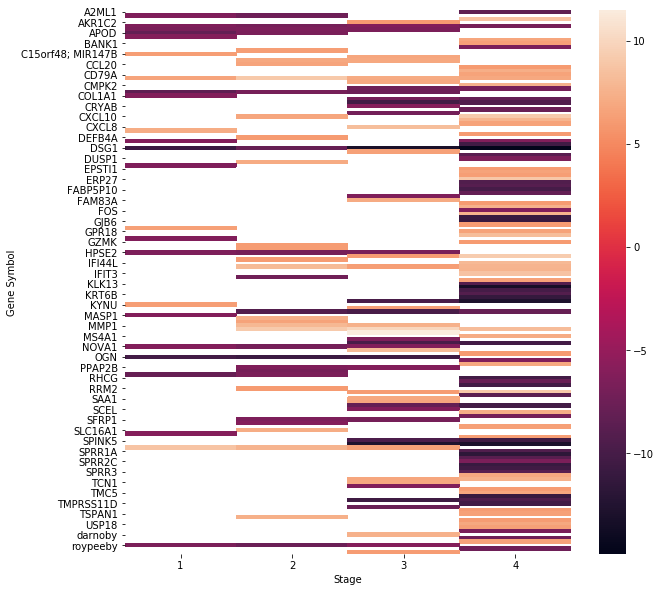

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(cross_table)

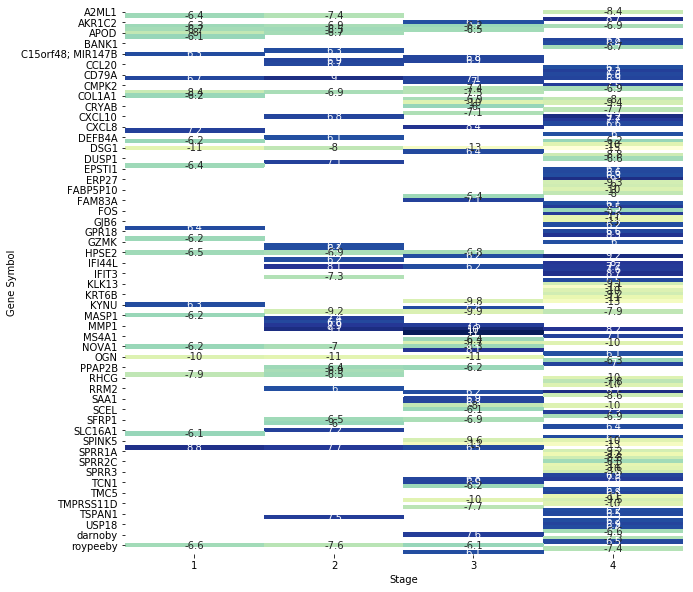

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(cross_table,cmap="YlGnBu", annot=True, cbar=False)

In [48]:
all_df2=all_df[['Gene Symbol','Stage','abs_log2']]

In [49]:
#all_df2

In [50]:
pivot_table=all_df2.pivot('Gene Symbol','Stage')

ValueError: Index contains duplicate entries, cannot reshape

In [51]:
df = all_df2.drop_duplicates(['Gene Symbol','Stage'])

In [52]:
#df

In [53]:
pivot_table=df.pivot('Gene Symbol','Stage')

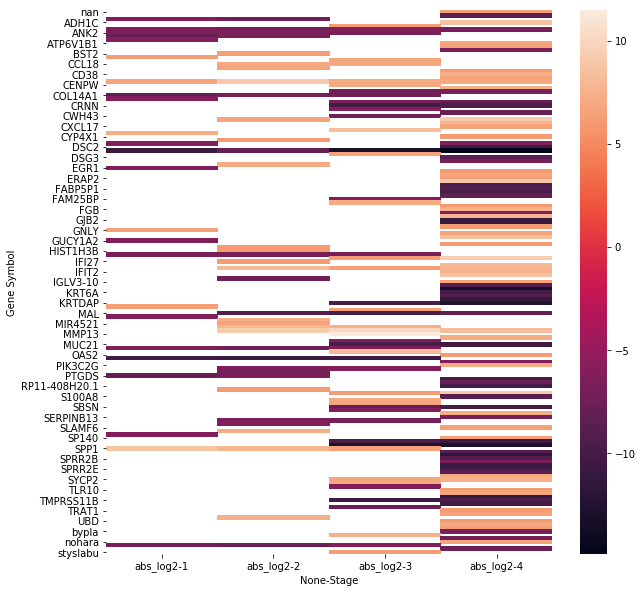

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_table)

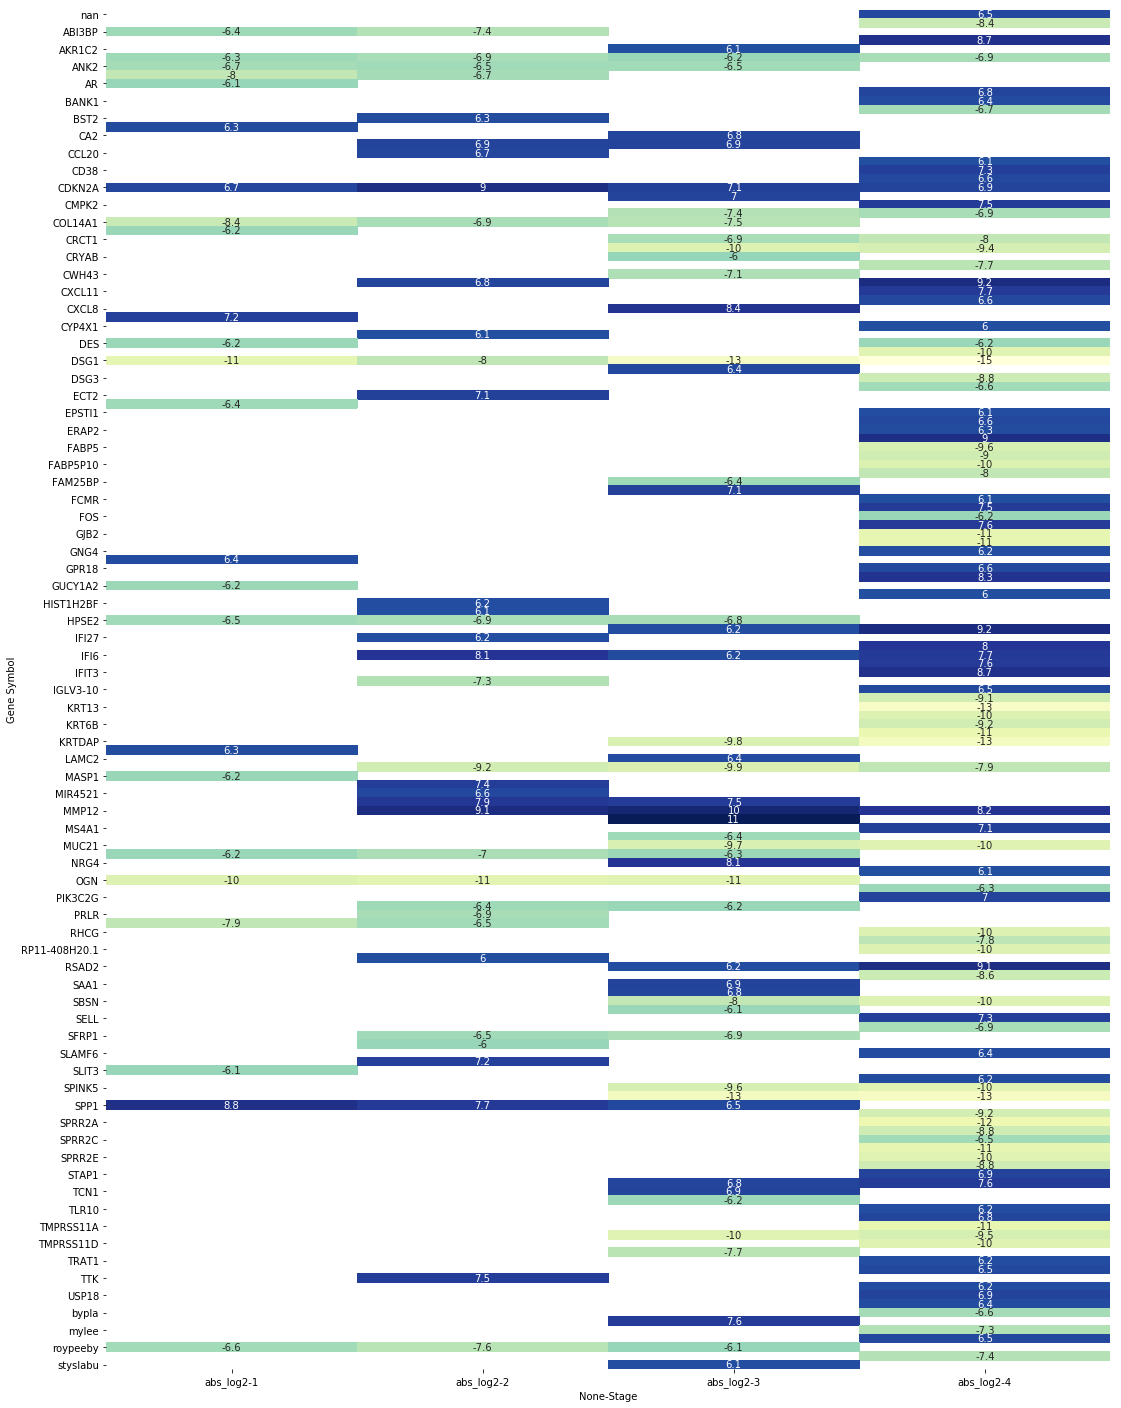

In [59]:
plt.figure(figsize=(18,25))
sns.heatmap(pivot_table,cmap="YlGnBu", annot=True, cbar=False)